In [1]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import geopy
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

In [2]:
location_df=pd.read_csv("DataSample.csv")
location_df.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730


In [3]:
poi_df=pd.read_csv("POIList.csv")
clean_poi=poi_df.drop_duplicates(subset=[' Latitude','Longitude'])
clean_poi

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [4]:
#data clean up
suspicious_data=location_df[location_df.duplicated([' TimeSt','Latitude','Longitude'])]

In [5]:
suspicious_data

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
12,4517047,2017-06-21 12:00:00.950,CA,ON,London,43.00910,-81.17650
19,4517347,2017-06-21 03:00:00.287,CA,ON,Windsor,42.29570,-82.95990
37,4518179,2017-06-21 08:00:00.663,CA,ON,Kitchener,43.46760,-80.48470
56,4519066,2017-06-21 07:00:00.747,CA,ON,Tillsonburg,42.86185,-80.72991
77,4520202,2017-06-21 17:00:02.433,CA,ON,Windsor,42.26540,-83.02610
...,...,...,...,...,...,...,...
21978,5613024,2017-06-21 21:22:52.703,CA,ON,Burlington,43.30160,-79.85820
21986,5613395,2017-06-21 18:22:52.750,CA,ON,Toronto,43.71290,-79.38880
22011,5614409,2017-06-21 20:22:53.367,CA,ON,Mississauga,43.58730,-79.60760
22013,5614486,2017-06-21 04:22:54.890,CA,ON,Toronto,43.70680,-79.39910


In [6]:
clean_df=location_df.drop_duplicates(subset=[' TimeSt','Latitude','Longitude'])

In [7]:
clean_df

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730
...,...,...,...,...,...,...,...
22019,5614760,2017-06-21 08:23:01.793,CA,AB,Calgary,51.02093,-114.10621
22020,5614801,2017-06-21 12:23:07.880,CA,ON,Saint Catharines,43.16440,-79.24560
22022,5614909,2017-06-21 00:23:07.903,CA,ON,Whitby,43.88730,-78.94220
22023,5614912,2017-06-21 11:23:07.953,CA,ON,Oakville,43.49340,-79.71260


In [8]:
#label 
clean_geo_points=clean_df[['Latitude','Longitude']]
clean_geo_points

,Latitude,Longitude
0,43.49347,-80.49123
1,42.93990,-81.27090
2,43.57760,-80.22010
3,43.37160,-80.97730
4,43.37160,-80.97730
...,...,...
22019,51.02093,-114.10621
22020,43.16440,-79.24560
22022,43.88730,-78.94220
22023,43.49340,-79.71260


In [9]:
Lat=[]
Lng=[]
for index, row in clean_poi.iterrows():
    Lat.append(row[" Latitude"])
    Lng.append(row["Longitude"])
coords_1=(Lat[0],Lng[0])
coords_2=(Lat[1],Lng[1])
coords_3=(Lat[2],Lng[2])
geodesic(coords_1, coords_2).miles

1851.5920499579456

In [10]:
clean_geo_points['min dist']=''
clean_geo_points['closest poi']=''
for index, row in clean_geo_points.iterrows():
    target=(clean_geo_points.loc[index,"Latitude"],clean_geo_points.loc[index,"Longitude"])
    dist_1=geodesic(coords_1, target).miles
    dist_2=geodesic(coords_2, target).miles
    dist_3=geodesic(coords_3, target).miles
    min_dist=min(dist_1,dist_2,dist_3)
    clean_geo_points.loc[index,"min dist"]=min_dist
    if min_dist == dist_1:
        clean_geo_points.loc[index,'closest poi']=1
    elif min_dist == dist_2:
        clean_geo_points.loc[index,'closest poi']=2
    else:
        clean_geo_points.loc[index,'closest poi']=3
clean_geo_points.head()

C:\Users\16478\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\16478\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\16478\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Latitude,Longitude,min dist,closest poi
0,43.49347,-80.49123,369.569,2
1,42.93990,-81.27090,421.759,2
2,43.57760,-80.22010,354.77,2
3,43.37160,-80.97730,395.305,2
4,43.37160,-80.97730,395.305,2


In [11]:
clean_geo_points["min dist"]=clean_geo_points["min dist"].astype(float)
poi=clean_geo_points.groupby(["closest poi"]).mean()

C:\Users\16478\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
poi["std"]=clean_geo_points.groupby(["closest poi"]).std()["min dist"]
poi

,Latitude,Longitude,min dist,std
closest poi,,,,
1,51.881877,-113.138242,187.847773,256.620696
2,44.231803,-78.731890,281.269522,139.263652
3,45.572842,-59.579321,309.666122,917.325936


In [13]:
poi["max radius"]=clean_geo_points.groupby(["closest poi"]).max()["min dist"]
poi

,Latitude,Longitude,min dist,std,max radius
closest poi,,,,,
1,51.881877,-113.138242,187.847773,256.620696,7171.760339
2,44.231803,-78.731890,281.269522,139.263652,932.338420
3,45.572842,-59.579321,309.666122,917.325936,5819.349805


In [14]:
poi["count"]=clean_geo_points.groupby(["closest poi"]).count()["min dist"]
poi

,Latitude,Longitude,min dist,std,max radius,count
closest poi,,,,,,
1,51.881877,-113.138242,187.847773,256.620696,7171.760339,9726
2,44.231803,-78.731890,281.269522,139.263652,932.338420,9796
3,45.572842,-59.579321,309.666122,917.325936,5819.349805,477


In [15]:
poi["request per area"]=poi["count"]/(np.power(poi["max radius"],2)*np.pi)
poi

,Latitude,Longitude,min dist,std,max radius,count,request per area
closest poi,,,,,,,
1,51.881877,-113.138242,187.847773,256.620696,7171.760339,9726,0.000060
2,44.231803,-78.731890,281.269522,139.263652,932.338420,9796,0.003587
3,45.572842,-59.579321,309.666122,917.325936,5819.349805,477,0.000004


In [16]:
poi_1=clean_geo_points[clean_geo_points['closest poi'] == 1]
poi_2=clean_geo_points[clean_geo_points['closest poi'] == 2]
poi_3=clean_geo_points[clean_geo_points['closest poi'] == 3]

In [17]:
print(poi_1['min dist'].describe())
print("------------")
print(poi_2['min dist'].describe())
print("------------")
print(poi_3['min dist'].describe())

count    9726.000000
mean      187.847773
std       256.620696
min         0.217228
25%         9.486285
50%       172.596882
75%       194.901566
max      7171.760339
Name: min dist, dtype: float64
------------
count    9796.000000
mean      281.269522
std       139.263652
min         0.503018
25%       285.351068
50%       314.486456
75%       331.410239
max       932.338420
Name: min dist, dtype: float64
------------
count     477.000000
mean      309.666122
std       917.325936
min        10.081376
25%        46.772571
50%        97.727434
75%       171.555420
max      5819.349805
Name: min dist, dtype: float64


In [18]:
import seaborn as sns

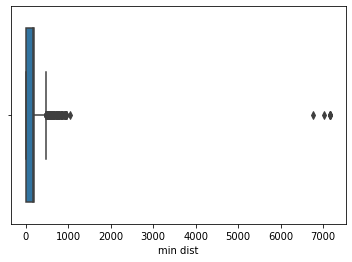

In [61]:
ax = sns.boxplot(x=poi_1["min dist"])

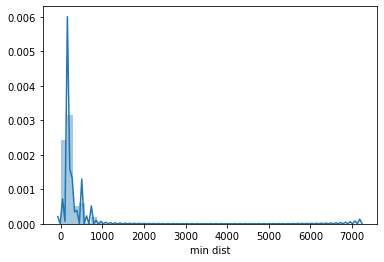

In [62]:
ax = sns.distplot(poi_1["min dist"])

In [20]:
data=[]
for index,row in poi_1.iterrows():
    data.append(row["min dist"])
data_array=np.asarray(data)
data_to_normalize=data_array.reshape(-1,1)

In [21]:
pt = PowerTransformer()
print(pt.fit(data_to_normalize))
transformed_data_power_1=pt.transform(data_to_normalize)

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)


# ax = sns.boxplot(x=transformed_data_power_1)

In [23]:
print(max(transformed_data_power_1))
print(min(transformed_data_power_1))

[5.93765066]
[-1.8228197]


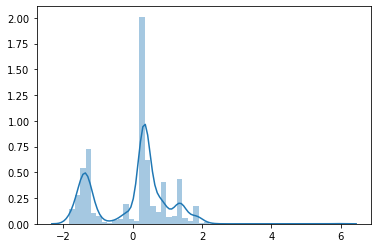

In [60]:
ax = sns.distplot(transformed_data_power_1)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


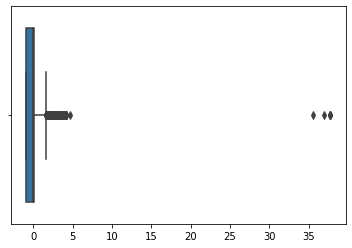

In [26]:
rs = RobustScaler()
print(rs.fit(data_to_normalize))
transformed_data_robust=rs.transform(data_to_normalize)
ax1 = sns.boxplot(x=transformed_data_robust)

[[0.80765748]
 [0.21614037]
 [0.80765748]
 ...
 [0.33168956]
 [0.88948111]
 [0.6123209 ]]


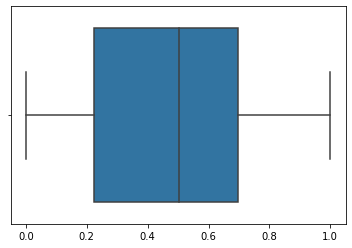

In [28]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
transformed_data_qt=qt.fit_transform(data_to_normalize)
print(transformed_data_qt)
ax = sns.boxplot(x=transformed_data_qt)

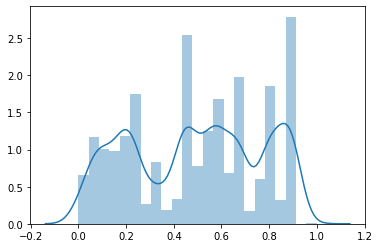

In [59]:
ax = sns.distplot(transformed_data_qt)

In [35]:
a=-10
b=10
transformed_data_qt_normal=(b-a)*(transformed_data_qt-
                                  min(transformed_data_qt))/(max(transformed_data_qt)-
                                                             min(transformed_data_qt))+a

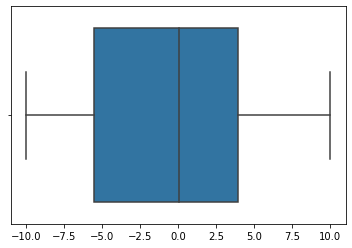

In [36]:
ax = sns.boxplot(x=transformed_data_qt_normal)

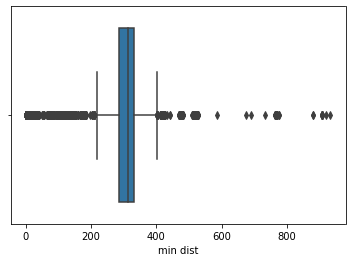

In [29]:
ax = sns.boxplot(x=poi_2["min dist"])

In [30]:
data_2=[]
for index,row in poi_2.iterrows():
    data_2.append(row["min dist"])
data_array_2=np.asarray(data_2)
data_to_normalize_2=data_array_2.reshape(-1,1)

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)


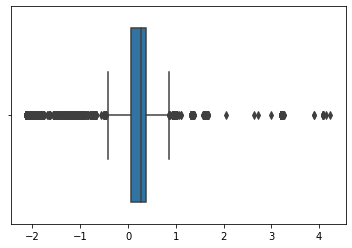

In [31]:
pt = PowerTransformer()
print(pt.fit(data_to_normalize_2))
transformed_data_power_2=pt.transform(data_to_normalize_2)
ax = sns.boxplot(x=transformed_data_power_2)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


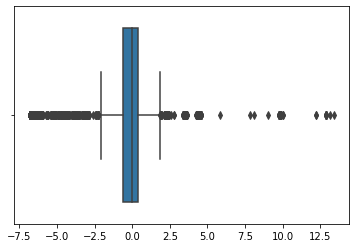

In [32]:
rs = RobustScaler()
print(rs.fit(data_to_normalize_2))
transformed_data_robust_2=rs.transform(data_to_normalize_2)
ax1 = sns.boxplot(x=transformed_data_robust_2)

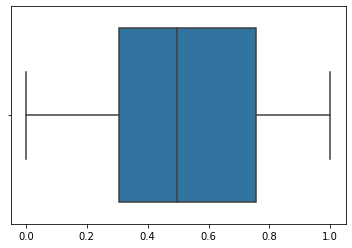

In [33]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
transformed_data_qt_2=qt.fit_transform(data_to_normalize_2)
ax = sns.boxplot(x=transformed_data_qt_2)

In [37]:
a=-10
b=10
transformed_data_qt_normal_2=(b-a)*(transformed_data_qt_2-
                                  min(transformed_data_qt_2))/(max(transformed_data_qt_2)-
                                                             min(transformed_data_qt_2))+a

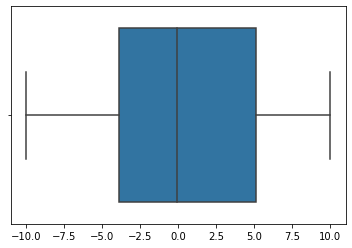

In [38]:
ax = sns.boxplot(x=transformed_data_qt_normal_2)

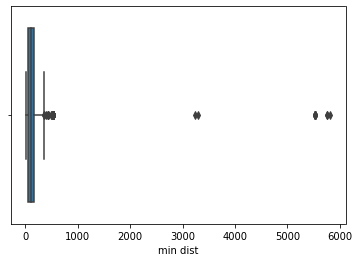

In [34]:
ax = sns.boxplot(x=poi_3["min dist"])

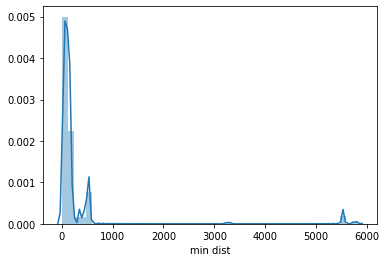

In [55]:
ax = sns.distplot(poi_3["min dist"])

In [39]:
data_3=[]
for index,row in poi_3.iterrows():
    data_3.append(row["min dist"])
data_array_3=np.asarray(data_3)
data_to_normalize_3=data_array_3.reshape(-1,1)

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)


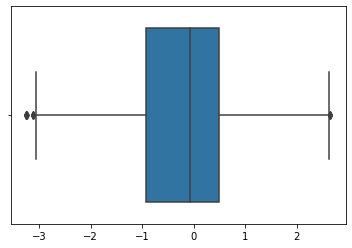

In [57]:
print(pt.fit(data_to_normalize_3))
transformed_data_power_3=pt.transform(data_to_normalize_3)
ax = sns.boxplot(x=transformed_data_power_3)

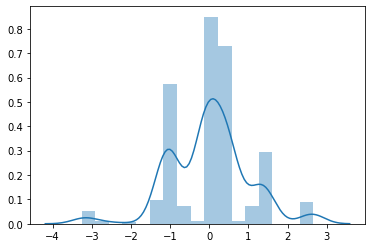

In [58]:
ax=sns.distplot(transformed_data_power_3)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


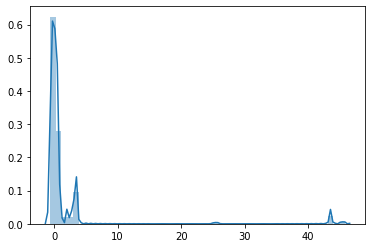

In [52]:
print(rs.fit(data_to_normalize_3))
transformed_data_robust_3=rs.transform(data_to_normalize_3)

ax3=sns.distplot(transformed_data_robust_3)

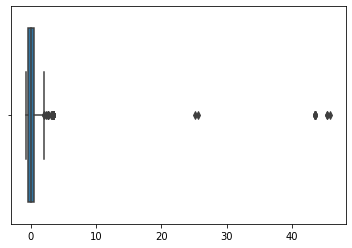

In [53]:
ax1 = sns.boxplot(x=transformed_data_robust_3)

0.4956264917958002


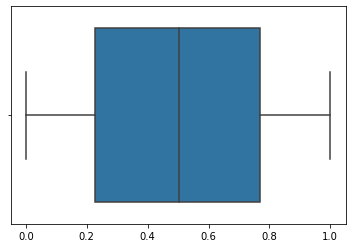

In [51]:
transformed_data_qt_3=qt.fit_transform(data_to_normalize_3)
print(transformed_data_qt_3.mean())
ax = sns.boxplot(x=transformed_data_qt_3)

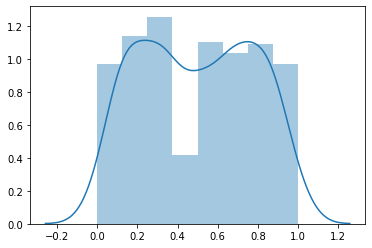

In [54]:
ax3=sns.distplot(transformed_data_qt_3)

-0.08747016408399687


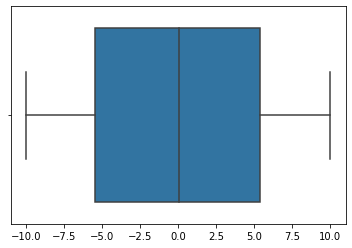

In [46]:
a=-10
b=10
transformed_data_qt_normal_3=(b-a)*(transformed_data_qt_3-
                                  min(transformed_data_qt_3))/(max(transformed_data_qt_3)-
                                                             min(transformed_data_qt_3))+a
print(transformed_data_qt_normal_3.mean())
ax = sns.boxplot(x=transformed_data_qt_normal_3)

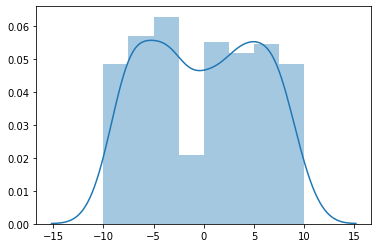

In [56]:
ax3=sns.distplot(transformed_data_qt_normal_3)